In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

The power distribution is of the form `S(w) = (1/w)^B`. Define a function to recover time series from power law spectrum.

In [10]:
def simulate(B):
    
    N = 1024
    
    # Define frequencies from 0 to 2*pi
    w = np.linspace(0,2*np.pi,N)
    f = np.zeros(N) * complex(0)
    
    for i in xrange(1,len(w)):
        
        # Draw two guassian distributed numbers
        a1 = np.random.normal()
        a2 = np.random.normal()
    
        # Multiply by (1/w)^B to get real and imaginary parts
        real = a1 * np.power((1/w[i]),B/2)
        imaginary = a2 * np.power((1/w[i]),B/2)
    
        # Form a complex number corresponding to frequencies
        f[i] = complex(real, imaginary)
       
    # Obtain real valued time series
    f_conj = np.conjugate(f)
    
    # Obtain time series
    f_inv = np.fft.ifft(f_conj)

    return f_inv

Start with `B=1` to get a _flicker noise_ distribution.

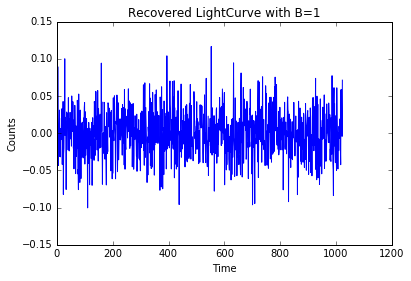

In [11]:
f = simulate(1)
plt.plot(np.real(f))    
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Recovered LightCurve with B=1')

Try out with `B=2` to get _random walk_ distribution.

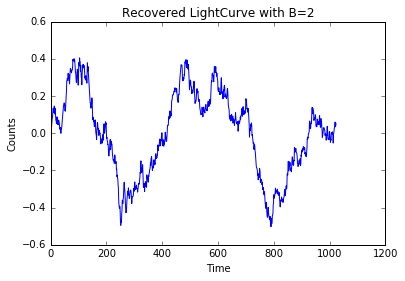

In [12]:
f = simulate(2)
plt.plot(np.real(f))    
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Recovered LightCurve with B=2')